# Session 3 Exercises

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import math

import warnings
warnings.filterwarnings("ignore")

datapath = Path('data')

quakes = pd.read_csv(datapath / Path('earthquake.csv'))

covid_parsed = pd.read_pickle(datapath / Path('covid_parsed.pkl'))

In [159]:
# To display more columns/rows of a dataframe you can control the output by using
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1

- Read in the data in the covid.csv file
- Create a date column by parsing the dateRep column into a datetime
- Set the date column as the index
- Use the replace() method to update all occurrences of United_States_of_America and United Kingdom to USA and UK, respectively
- Sort the index

In [216]:
# Define the file path using Path from the pathlib library and reaf the data
path = Path("data") / Path("covid.csv")
df = pd.read_csv(path)

# Convert the 'dateRep' column to datetime format, assuming day comes before month in the date
covid_df['date'] = pd.to_datetime(covid_df['dateRep'], dayfirst=True)

# Set the 'date' column as the index of the DataFrame
covid_df.set_index('date', inplace=True)

# Replace some values in the 'countriesAndTerritories' column for consistency
covid_df.replace({'countriesAndTerritories': {'United_States_of_America': 'USA', 'United Kingdom': 'UK'}}, inplace=True)

# Sort the DataFrame by the index (date) in ascending order and then 
covid_df.sort_index(inplace=True)

#Calling the DataFrame
covid_df


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11455519.0,Europe,NaN
2019-12-31,2019-12-31,31,12,2019,0,0,Mexico,MX,MEX,127575529.0,America,NaN
2019-12-31,2019-12-31,31,12,2019,0,0,Ecuador,EC,ECU,17373657.0,America,NaN
2019-12-31,2019-12-31,31,12,2019,0,0,Russia,RU,RUS,145872260.0,Europe,NaN
2019-12-31,2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,2020-09-19,19,9,2020,77,0,Guinea,GN,GIN,12771246.0,Africa,5.105218
2020-09-19,2020-09-19,19,9,2020,1771,62,Turkey,TR,TUR,82003882.0,Asia,28.358414
2020-09-19,2020-09-19,19,9,2020,28,0,Guinea_Bissau,GW,GNB,1920917.0,Africa,3.019391


In [218]:
# Print the minimum date in the DataFrame's index and the maximum date to check the index
print(covid_df.index.min())
print(covid_df.index.max())

2019-12-31 00:00:00
2020-09-19 00:00:00


## 2
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater. Display them sorted by time. Only output the magnitude and the place.

In [219]:
# Read earthquake data from a CSV file into a DataFrame named 'quakes'
quakes = pd.read_csv('earthquake.csv')

# Convert the 'time' column to datetime format (assuming it's in milliseconds since epoch)
quakes['time'] = pd.to_datetime(earthquake_df['time'], unit='ms') 

# Filter earthquakes in Japan with a magnitude of 4 or greater
japan_earthquakes = quakes[(quakes['place'].str.contains('Japan')) & (earthquake_df['mag'] >= 4)]

# Sort the earthquakes in Japan by time (date) in ascending order
japan_earthquakes = japan_earthquakes.sort_values(by='time')

# Create a new DataFrame containing only 'mag' (magnitude), 'place', and 'time' columns
magnitude_place_time = japan_earthquakes[['mag', 'place', 'time']]

# Create another DataFrame containing only 'mag' (magnitude) and 'place' columns
magnitude_and_place = japan_earthquakes[['mag', 'place']]

# Print the resulting DataFrame 'magnitude_place_time' which contains earthquake data in Japan
magnitude_place_time

,mag,place,time
9198,4.6,"3km ESE of Sugito, Japan",2018-09-18 08:11:11.290
9083,5.1,"23km ENE of Ishinomaki, Japan",2018-09-18 16:21:49.100
9070,4.7,"96km E of Hasaki, Japan",2018-09-18 16:54:28.660
8687,4.2,"39km NE of Misawa, Japan",2018-09-19 21:24:27.190
8555,4.6,"105km ENE of Miyako, Japan",2018-09-20 07:44:26.000
8550,4.4,"105km ENE of Miyako, Japan",2018-09-20 08:08:09.800
8431,4.6,"171km E of Nago, Japan",2018-09-20 14:57:27.970
8376,4.4,"171km E of Nago, Japan",2018-09-20 19:06:22.450
8327,4.2,"34km ESE of Chitose, Japan",2018-09-20 22:56:09.100
8324,4.6,"167km E of Nago, Japan",2018-09-20 23:06:02.840


In [220]:
# Call the DataFrame containing earthquake magnitude and location (place) data
magnitude_and_place

,mag,place
9198,4.6,"3km ESE of Sugito, Japan"
9083,5.1,"23km ENE of Ishinomaki, Japan"
9070,4.7,"96km E of Hasaki, Japan"
8687,4.2,"39km NE of Misawa, Japan"
8555,4.6,"105km ENE of Miyako, Japan"
8550,4.4,"105km ENE of Miyako, Japan"
8431,4.6,"171km E of Nago, Japan"
8376,4.4,"171km E of Nago, Japan"
8327,4.2,"34km ESE of Chitose, Japan"
8324,4.6,"167km E of Nago, Japan"


## 3
Create bins for each full number of earthquake magnitude (magType = 'ml') and count how many are in each bin. Output them in magnitude order.

In [221]:
# Filter earthquakes with 'magType' equal to 'ml'
ml_quakes = quakes[quakes['magType'] == 'ml']

# Round down magnitudes to the nearest whole number and store in 'rounded_mag' column
ml_quakes['rounded_mag'] = np.floor(ml_quakes['mag'])

# Define bins for each full number of earthquake magnitude
bins = np.arange(ml_quakes['rounded_mag'].min(), ml_quakes['rounded_mag'].max() + 1)

# Group earthquakes by magnitude bins and count occurrences within each bin
magnitude_counts = ml_quakes.groupby(pd.cut(ml_quakes['rounded_mag'], bins=bins)).size().reset_index(name='Count')

# Rename the 'rounded_mag' column to 'Magnitude' for clarity
magnitude_counts.rename(columns={'rounded_mag': 'Magnitude'}, inplace=True)

# Sort the counts by 'Magnitude' in ascending order
result = magnitude_counts.sort_values(by='Magnitude')

# Display the result showing earthquake magnitude bins and their respective counts
result

,Magnitude,Count
0,"(-2.0, -1.0]",446
1,"(-1.0, 0.0]",2072
2,"(0.0, 1.0]",3126
3,"(1.0, 2.0]",985
4,"(2.0, 3.0]",153
5,"(3.0, 4.0]",6
6,"(4.0, 5.0]",2


## 4
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

Floating point numbers should have two decimals.

In [222]:
# Group the 'faang_df' DataFrame by 'ticker' and resample data on a monthly basis
monthly_resampled = faang_df.groupby('ticker').resample('M')

# Define the aggregation functions for each column
aggregations = {
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum'
}

# Apply the aggregations while rounding to two decimal places
result = monthly_resampled.agg(aggregations).round(2)

# Display the result
print(result)

                      open     high      low    close        volume
ticker date                                                        
AAPL   2018-01-31    43.51    45.03    41.17    43.50  2.638718e+09
       2018-02-28    41.82    45.15    37.56    41.91  3.711577e+09
       2018-03-31    43.76    45.88    41.24    43.62  2.854911e+09
       2018-04-30    42.44    44.74    40.16    42.46  2.664617e+09
       2018-05-31    46.24    47.59    41.32    46.38  2.483905e+09
       2018-06-30    47.18    48.55    45.18    47.16  2.110498e+09
       2018-07-31    47.55    48.99    45.85    47.58  1.574766e+09
       2018-08-31    53.12    57.22    49.33    53.34  2.801276e+09
       2018-09-30    55.58    57.42    53.83    55.52  2.715888e+09
       2018-10-31    55.30    58.37    51.52    55.21  3.158994e+09
       2018-11-30    47.95    55.59    42.56    47.81  3.845306e+09
       2018-12-31    41.31    46.24    36.65    41.07  3.595690e+09
AMZN   2018-01-31  1301.38  1472.58  1170.51  13

## 5

Calculate the z-scores for each numeric column of Amazon's data (faang.csv) but only for Q4 of 2018

In [223]:
# Filter the 'faang' DataFrame to select data for Amazon (AMZN) during Q4 of 201
amazon_q4_2018 = faang[(faang['ticker'] == 'AMZN') & (faang.index >= '2018-10-01') & (faang.index <= '2018-12-31')]

# Calculate z-scores for numeric columns (excluding 'ticker')
numeric_columns = ['open', 'high', 'low', 'close', 'volume']
z_scores = (amazon_q4_2018[numeric_columns] - amazon_q4_2018[numeric_columns].mean()) / amazon_q4_2018[numeric_columns].std()

# Display the calculated z-scores for Amazon's Q4 2018 data
print(z_scores)

                open      high       low     close    volume
date                                                        
2018-10-01  2.337813  2.368006  2.502113  2.385848 -1.630411
2018-10-02  2.190795  2.227302  2.247433  2.155037 -0.861879
2018-10-03  2.068570  2.058955  2.139987  2.025489 -0.920345
2018-10-04  1.850048  1.819474  1.781561  1.722816 -0.126582
2018-10-05  1.642819  1.628173  1.554416  1.584748 -0.298771
2018-10-08  1.348850  1.435736  1.337840  1.408550 -0.072632
2018-10-09  1.255226  1.397931  1.483660  1.449753 -1.110557
2018-10-10  1.241193  1.127040  0.824506  0.646139  1.351658
2018-10-11  0.346454  0.393958  0.357894  0.395494  2.518992
2018-10-12  0.907796  0.774498  0.744527  0.879115  0.739946
2018-10-15  0.820922  0.675721  0.688649  0.685946 -0.451312
2018-10-16  0.744071  0.880595  0.872575  1.098054 -0.679986
2018-10-17  1.140285  1.030679  1.178555  1.180252 -0.903669
2018-10-18  0.997945  0.925151  0.915122  0.754177 -0.674401
2018-10-19  0.755165  0.

## 6
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.
Show only the first 5 days per ticker.

In [224]:
# Load the faang data from the CSV file
faang_df = pd.read_csv('/Users/camilahennessey/Computational Data Analytics/data/faang.csv')

# Convert the 'date' column to datetime type
faang_df['date'] = pd.to_datetime(faang_df['date'])

# Set the 'date' column as the DataFrame's index
faang_df.set_index('date', inplace=True)

# Group the data by 'ticker'
grouped = faang_df.groupby('ticker')

# Initialize an empty list to store DataFrame slices after normalization
normalized_dfs = []  # Initialize an empty list to store DataFrame slices

# Loop through each group (ticker) and normalize the data
for ticker, group_data in grouped:
    numeric_columns = group_data.select_dtypes(include=['number']).columns # Select columns with numeric data types
    first_row = group_data.iloc[0]# Extract the first row of each group
    normalized_data = group_data[numeric_columns] / first_row[numeric_columns] # Normalize the data by dividing it by the values in the first row
    normalized_data['ticker'] = ticker  # Ensure the 'ticker' column is included for reference
    normalized_dfs.append(normalized_data.head(5)) # Append the first 5 rows of the normalized data to the list

normalized_df = pd.concat(normalized_dfs)  # Concatenate all the DataFrame slices into a single DataFrame
normalized_df.reset_index(inplace=True) # Reset the index to include 'date' as a column

# Print the final normalized DataFrame
print(normalized_df)

         date      high       low      open     close    volume ticker
0  2018-01-02       1.0       1.0       1.0       1.0       1.0   AAPL
1  2018-01-03  1.013059  1.015952  1.013928  0.999826  1.155033   AAPL
2  2018-01-04   1.00679  1.016661  1.013987   1.00447  0.877864   AAPL
3  2018-01-05  1.017818  1.022392  1.019276  1.015906  0.925814   AAPL
4  2018-01-08  1.019211  1.027591  1.024624  1.012133  0.804816   AAPL
5  2018-01-02       1.0       1.0       1.0       1.0       1.0   AMZN
6  2018-01-03  1.013017  1.015199  1.013908  1.012775  1.153758   AMZN
7  2018-01-04  1.021739  1.029175  1.028157  1.017308  1.121581   AMZN
8  2018-01-05  1.032891  1.033737  1.038831  1.033751  1.315532   AMZN
9  2018-01-08  1.053008  1.052558  1.054608  1.048662  1.588235   AMZN
10 2018-01-02       1.0       1.0       1.0       1.0       1.0     FB
11 2018-01-03  1.017623   1.02129  1.023638  1.017914  0.930294     FB
12 2018-01-04  1.025498  1.036891  1.040635   1.01604  0.764708     FB
13 201

## 7
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'.
Also show the number of earthquakes per country for the above.

In [225]:
# Filter the earthquake data DataFrame to select rows where 'magType' is 'ml', 'md', or 'mb'
filtered_df = earthquake_df[earthquake_df['magType'].isin(['ml', 'md', 'mb'])]

# Display the first 20 rows of the filtered DataFrame for examination
filtered_df.head(20)

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,2018-10-13 23:59:28.010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,2018-10-13 23:58:49.610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,2018-10-13 23:57:42.610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,2018-10-13 23:56:18.070,"9km NE of Aguanga, CA",0,California
4,2.16,md,2018-10-13 23:51:56.050,"10km NW of Avenal, CA",0,California
5,2.61,md,2018-10-13 23:34:46.440,"55km ESE of Punta Cana, Dominican Republic",0,Dominican Republic
6,1.70,ml,2018-10-13 23:26:16.017,"105km W of Talkeetna, Alaska",0,Alaska
7,1.13,md,2018-10-13 23:24:20.280,"10km NW of Parkfield, CA",0,California
8,0.92,md,2018-10-13 23:24:02.310,"6km NW of The Geysers, CA",0,California
9,4.70,mb,2018-10-13 23:20:14.760,"219km SSE of Saparua, Indonesia",0,Indonesia


In [226]:
# Retrieve and display the column names of the 'filtered_df' DataFrame
filtered_df.columns

Index(['mag', 'magType', 'time', 'place', 'tsunami', 'parsed_place'], dtype='object')

In [227]:
# Filter the earthquake data DataFrame to select rows where 'magType' is 'ml', 'md', or 'mb'
filtered_df = earthquake_df[earthquake_df['magType'].isin(['ml', 'md', 'mb'])]

# Extract country information from 'place' column (assuming 'place' has format 'Location, Country')
# If the format is different, you may need to adjust the split logic accordingly
filtered_df['country'] = filtered_df['place'].str.split(',').str[-1].str.strip()

# Now follow the steps to modify 'country' column for USA states, count earthquakes, and filter for top countries
# Since this logic requires modification of the DataFrame, it's a good practice to work on a copy to avoid SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Modify the 'country' column to classify all USA states as 'USA'
usa_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", 
              "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", 
              "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
              "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
              "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", 
              "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", 
              "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
              "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", 
              "Washington", "West Virginia", "Wisconsin", "Wyoming", "CA"]

filtered_df['country'] = filtered_df['country'].apply(lambda x: 'USA' if x in usa_states or x == 'CA' else x)

# Proceed with counting earthquakes per country and filtering for top 5 countries
earthquake_counts = filtered_df.groupby('country').size()
top_countries = earthquake_counts.sort_values(ascending=False).head(5)
top_countries_df = filtered_df[filtered_df['country'].isin(top_countries.index)]

# Display the number of earthquakes per country for the specified magnitude types
top_countries

country
USA                   8201
Puerto Rico            216
Indonesia              127
Dominican Republic      56
Canada                  55
dtype: int64

## 8
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

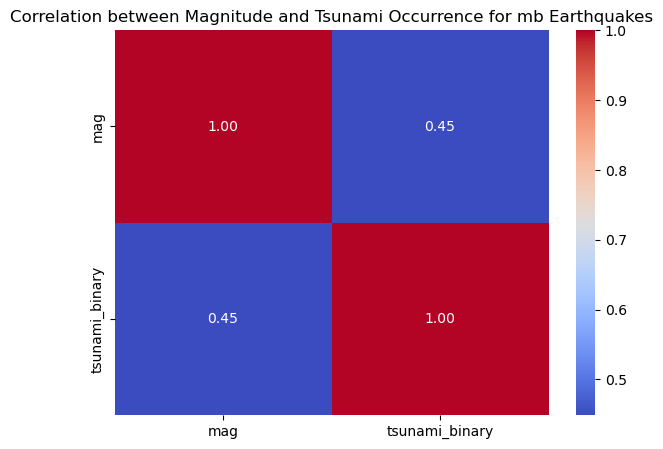

In [172]:
# Assuming 'quakes' is your DataFrame
# Filter for earthquakes with 'mb' magnitude type
mb_quakes = quakes[quakes['magType'] == 'mb']

# Ensure the 'tsunami' column is binary; this step might be redundant if it's already the case
# 1 for tsunami occurred, 0 for no tsunami
mb_quakes['tsunami_binary'] = mb_quakes['tsunami'].apply(lambda x: 1 if x == 1 else 0)

# Calculate the correlation matrix
correlation_matrix = mb_quakes[['mag', 'tsunami_binary']].corr()

# Create the heatmap
plt.figure(figsize=(7, 5))  # Optionally adjust the size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Magnitude and Tsunami Occurrence for mb Earthquakes')
plt.show()


## 9
For the 5 countries with the most covid cases (cumulative), find the day with the largest number of cases.

In [173]:
# Group by 'countriesAndTerritories'
covid_countries = covid_parsed.groupby('countriesAndTerritories')

# Sum the 'cases' for each country to get cumulative cases
cumulative_cases = covid_countries['cases'].sum()

# Find the day with the largest number of cases for each country
max_cases_day = covid_countries.apply(lambda x: x.loc[x['cases'].idxmax()])

# Sort by cumulative cases and select the top 5 countries
top_countries = cumulative_cases.nlargest(5).index
for country in top_countries:
    print(f"Country: {country}, Day with the most cases: {max_cases_day.loc[country]['dateRep']}")


Country: USA, Day with the most cases: 25/07/2020
Country: India, Day with the most cases: 17/09/2020
Country: Brazil, Day with the most cases: 30/07/2020
Country: Russia, Day with the most cases: 18/07/2020
Country: Peru, Day with the most cases: 17/08/2020


## 10
Find the 7-day average change in COVID-19 cases for the last week in the data for the countries found in part 2.

In [174]:
# Filter data for the top 5 countries
top_countries_data = covid_parsed[covid_parsed['countriesAndTerritories'].isin(top_countries)]

# Convert 'dateRep' column to datetime
top_countries_data['dateRep'] = pd.to_datetime(top_countries_data['dateRep'], format='%d/%m/%Y')

# Sort data by country and date
top_countries_data = top_countries_data.sort_values(by=['countriesAndTerritories', 'dateRep'])

# Calculate 7-day average change in cases
top_countries_data['7_day_avg_change'] = top_countries_data.groupby('countriesAndTerritories')['cases'].diff().rolling(window=7).mean()

# Filter data for the last week
last_week_data = top_countries_data[top_countries_data['dateRep'] >= top_countries_data['dateRep'].max() - pd.DateOffset(days=6)]

# Display the result
print(last_week_data[['countriesAndTerritories', 'dateRep', 'cases', '7_day_avg_change']])


           countriesAndTerritories    dateRep  cases  7_day_avg_change
date                                                                  
2020-09-12                  Brazil 2020-09-12  43718      -1068.000000
2020-09-13                  Brazil 2020-09-13  33523        479.285714
2020-09-14                  Brazil 2020-09-14  14768         35.285714
2020-09-15                  Brazil 2020-09-15  15155        697.428571
2020-09-16                  Brazil 2020-09-16  36653       3196.285714
2020-09-17                  Brazil 2020-09-17  36820        143.428571
2020-09-18                  Brazil 2020-09-18  36303       -607.714286
2020-09-12                   India 2020-09-12  97570       1591.142857
2020-09-13                   India 2020-09-13  94372        534.285714
2020-09-14                   India 2020-09-14  92071        181.285714
2020-09-15                   India 2020-09-15  83809       1142.857143
2020-09-16                   India 2020-09-16  90123         59.571429
2020-0

## 11
Find the first date that each country other than China had cases:

In [175]:
# Ensure 'dateRep' is in datetime format
covid_df['dateRep'] = pd.to_datetime(covid_df['dateRep'], format='%d/%m/%Y')

# Filter out China, sort by date, then drop duplicates keeping the first instance for each country
first_case_dates = (
    covid_df
    .query("countriesAndTerritories != 'China' and cases > 0")
    .sort_values(by=['countriesAndTerritories', 'dateRep'])
    .drop_duplicates(subset='countriesAndTerritories', keep='first')
    .loc[:, ['countriesAndTerritories', 'dateRep']]
)

# Reset index for a clean look
first_case_dates.reset_index(drop=True, inplace=True)

# Display the results
print(first_case_dates)


                        countriesAndTerritories    dateRep
0                                   Afghanistan 2020-02-25
1                                       Albania 2020-03-09
2                                       Algeria 2020-02-26
3                                       Andorra 2020-03-03
4                                        Angola 2020-03-22
5                                      Anguilla 2020-03-27
6                           Antigua_and_Barbuda 2020-03-15
7                                     Argentina 2020-03-04
8                                       Armenia 2020-03-01
9                                         Aruba 2020-03-13
10                                    Australia 2020-01-25
11                                      Austria 2020-02-26
12                                   Azerbaijan 2020-02-29
13                                      Bahamas 2020-03-16
14                                      Bahrain 2020-02-24
15                                   Bangladesh 2020-03-

## 12
Rank the countries by maximum total cases using percentiles. Sort by cases. Replace all _ with blank spaces. Show percentiles with two decimals.

In [176]:
# Calculate total cases per country with direct assignment for cleaner chaining
total_cases_per_country = covid_parsed.groupby('countriesAndTerritories')['cases'].sum()

# Create a DataFrame directly from the groupby object, reset index for country names
# Also, replace underscores in country names during the DataFrame creation
country_rankings = pd.DataFrame({
    'Country': total_cases_per_country.index.str.replace('_', ' '),
    'Total Cases': total_cases_per_country.values
}).reset_index(drop=True)

# Calculate percentiles and format directly within the DataFrame creation
country_rankings['Percentile'] = (total_cases_per_country.rank(pct=True) * 100).values

# Sort by Total Cases in descending order
country_rankings.sort_values(by='Total Cases', ascending=False, inplace=True)

# Format Percentile to show two decimals
country_rankings['Percentile'] = country_rankings['Percentile'].map("{:.2f}".format)

# Display the DataFrame
print(country_rankings)


                                        Country  Total Cases Percentile
195                                         USA      6674458     100.00
92                                        India      5214677      99.52
27                                       Brazil      4455386      99.05
159                                      Russia      1085281      98.57
152                                        Peru       750098      98.10
43                                     Colombia       743945      97.62
126                                      Mexico       684113      97.14
176                                South Africa       655572      96.67
179                                       Spain       640040      96.19
7                                     Argentina       588999      95.71
41                                        Chile       441150      95.24
70                                       France       415481      94.76
94                                         Iran       413149    

## 13
Write a Python function that matches a word containing 'z', not at the start or end of the word. It should output if it found a match.

In [228]:
# Define a function 'match_word_with_z' that checks for 'z' in the middle of a word, case-insensitive
def match_word_with_z(word):
    # Check for 'z' in the middle of the word, case-insensitive
    match = 'z' in word[1:-1].lower()
    message = f" {word} contains 'z' in the middle of the word" if match else f"{word} does not contain 'z' in the middle of the word"
    print(message)
    return match

# Examples
example1 = "Zebra"
example2 = "lazy"
example3 = "Coffee"

# Call the function 'match_word_with_z' with the examples
match_word_with_z(example1)
match_word_with_z(example2)
match_word_with_z(example3)

Zebra does not contain 'z' in the middle of the word
 lazy contains 'z' in the middle of the word
Coffee does not contain 'z' in the middle of the word


False

## 14
Write a Python program to remove leading zeros from an IP address (e.g.: 216.08.094.196 should become 216.8.94.196).

In [229]:
# Define a function 'remove_leading_zeros' to remove leading zeros from each octet in an IP address
def remove_leading_zeros(ip_address):
    # Use regex to replace leading zeros in each octet
    updated_ip_address = re.sub(r'\b0+(\d)', r'\1', ip_address)
    return updated_ip_address

# Example usage:
original_ip = "216.08.094.196"
updated_ip = remove_leading_zeros(original_ip)

# Print the original and updated IP addresses
print(f"Original IP address: {original_ip}")
print(f"Updated IP address: {updated_ip}")

Original IP address: 216.08.094.196
Updated IP address: 216.8.94.196


## 15
Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

2026-01-02 should become 02-01-2026

In [230]:
# Define a function 'convert_date_format' to convert a date from one format to another
def convert_date_format(input_date):
    # Split the input date string into components
    year, month, day = input_date.split('-')
    
    # Rearrange the components to the desired format
    output_date = f"{day}-{month}-{year}"
    
    return output_date

# Example usage:
input_date = "2026-01-02"
output_date = convert_date_format(input_date)

# Print the original and converted dates for comparison
print(f"Original date: {input_date}")
print(f"Converted date: {output_date}")

Original date: 2026-01-02
Converted date: 02-01-2026


## 16
Write a Python program to extract year, month and date from an url.

`url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"`

output: [('2016', '09', '02')]

In [180]:
url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"

# Define a regular expression pattern to match the date part in the URL
date_pattern = r'(\d{4})/(\d{2})/(\d{2})'

# Search for the date pattern in the URL
match = re.search(date_pattern, url)

if match:
    year, month, day = match.groups()
    result = [(year, month, day)]
    print(result)
else:
    print("No date found in the URL")



[('2016', '09', '02')]


## 17
Write a Python program to separate and print the numbers of a given string.

`String = "Ten 10, Twenty 20, Thirty 30"`

In [184]:
def extract_numbers_from_string(input_string):
    # Use regular expression to find all numbers in the string
    numbers = re.findall(r'\b\d+\b', input_string)

    return numbers

# Example usage:
input_string = "Ten 10, Twenty 20, Thirty 30"
numbers_from_string = extract_numbers_from_string(input_string)

# Print the original string and the extracted numbers
print("Original string:", input_string)
print("Extracted numbers:", numbers_from_string)


Original string: Ten 10, Twenty 20, Thirty 30
Extracted numbers: ['10', '20', '30']


## 18
Write a Python program to replace maximum 2 occurrences of space, comma, or dot with a colon.

In [231]:
def replace_chars_with_colon(input_string):
    # Replace a maximum of 2 occurrences of space, comma, or dot with a colon
    result_string = re.sub(r'[ ,.]+', ':', input_string, 2)

    return result_string

# Example usage:
input_string = "I am Colombian, but I love the United States."
result = replace_chars_with_colon(input_string)

# Print the original string and the modified string
print("Original string:", input_string)
print("Modified string:", result)


Original string: I am Colombian, but I love the United States.
Modified string: I:am:Colombian, but I love the United States.


## 19
Write a Python program to extract values between quotation marks of a string.

In [232]:
def extract_values_between_quotation_marks(input_string):
    values = re.findall(r'"(.*?)"', input_string)

    return values


text1 = '"Python", "PHP", "Java"'

# Call the 'extract_values_between_quotation_marks' function to extract text between double quotation marks
extract_values = extract_values_between_quotation_marks(text1)


# Print the original input string
print("Text between quotations:", text1)

# Print the extracted text enclosed in double quotation marks
print("Extracted text:", extract_values)

Text between quotations: "Python", "PHP", "Java"
Extracted text: ['Python', 'PHP', 'Java']


## 20
Write a Python program to remove multiple spaces in a string.

In [233]:
def remove_multiple_spaces(input_string):
    # Use a regular expression to replace multiple spaces with a single space
    cleaned_string = ' '.join(input_string.split())

    return cleaned_string

text1 = 'Python      Exercises'

# Call the 'remove_multiple_spaces' function to remove multiple spaces from the input string
cleaned_text1 = remove_multiple_spaces(text1)

# Print the original input string
print("Text with spaces:", text1)

# Print the cleaned text with multiple spaces replaced by a single space
print("Cleaned text:", cleaned_text1)

Text with spaces: Python      Exercises
Cleaned text: Python Exercises


## 21
Write a Python program to find all adverbs (ending on ly) and their positions in a given sentence.

In [234]:
def find_adverbs(sentence):
    adverbs = []
    positions = []
    
    # Use regular expression to find adverbs ending in "ly"
    adverb_pattern = r'\b\w+ly\b'
    matches = re.finditer(adverb_pattern, sentence)
    
    for match in matches:
        adverb = match.group()
        position = match.start()
        adverbs.append(adverb)
        positions.append(position)
    
    return adverbs, positions

# Example usage:
sentence = "She speaks softly and walks quickly."

# Call the 'find_adverbs' function to extract adverbs and their positions from the sentence
adverbs, positions = find_adverbs(sentence)


# Print the original sentence, extracted adverbs, and their positions
print("Sentence:", sentence)
print("Adverbs:", adverbs)
print("Positions:", positions)

Sentence: She speaks softly and walks quickly.
Adverbs: ['softly', 'quickly']
Positions: [11, 28]


## 22
Write a Python program to concatenate the consecutive numbers in a given string.

Sample text:
Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.

Sample solution:
Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.

In [235]:
def concatenate_consecutive_numbers(input_string):
    def repl(match):
        return match.group(1).replace(" ", "")

    # Use regular expression to find consecutive numbers and concatenate them
    concatenated_string = re.sub(r'(\d+(?:\s+\d+)*)', repl, input_string)

    return concatenated_string

# Example usage:
txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."
result_string = concatenate_consecutive_numbers(txt)

# Print the modified text with consecutive numbers concatenated
print("Modified text:", result_string)


Modified text: Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.


## 23
Write a Python function that checks whether a word stars and ends with a vowel in a given string. Return true if a word matches the condition; otherwise, return false.

Sample Data:
- ("Red Orange White") -> True
- ("Red White Black") -> False
- ("abcd dkise eosksu") -> True

In [236]:
def word_starts_and_ends_with_vowel(input_string):
    # Define a regular expression pattern to match words that start and end with vowels
    pattern = r'\b[aeiouAEIOU]\w*[aeiouAEIOU]\b'

    # Use re.findall to find all words matching the pattern
    matched_words = re.findall(pattern, input_string)

    # Check if any matching words were found
    return len(matched_words) > 0

# Sample Data
sample_data_1 = "Red Orange White"
sample_data_2 = "Red White Black"
sample_data_3 = "abcd dkise eosksu"

# Check the conditions for each sample data
result_1 = word_starts_and_ends_with_vowel(sample_data_1)
result_2 = word_starts_and_ends_with_vowel(sample_data_2)
result_3 = word_starts_and_ends_with_vowel(sample_data_3)

# Print the results for each sample data
print(f'("{sample_data_1}") -> {result_1}')
print(f'("{sample_data_2}") -> {result_2}')
print(f'("{sample_data_3}") -> {result_3}')


("Red Orange White") -> True
("Red White Black") -> False
("abcd dkise eosksu") -> True


## 24
Write a Python program to separate and print the numbers and their position of a given string.

In [237]:
def find_numbers_with_positions(input_string):
    numbers = []
    positions = []
    
    i = 0
    while i < len(input_string):
        if input_string[i].isdigit():  # Check if the current character is a digit
            start = i
            while i < len(input_string) and input_string[i].isdigit():
                i += 1
            end = i
            numbers.append(input_string[start:end])
            positions.append(start)
        else:
            i += 1
    
    return numbers, positions

# Example usage
text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."

# Call the 'find_numbers_with_positions' function to extract numbers and their positions from the text
numbers, positions = find_numbers_with_positions(text)

# Print the original input text, extracted numbers, and their positions for demonstration
print("Input text:", text)
print("Numbers found:", numbers)
print("Positions of numbers:", positions)

Input text: The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly.
Numbers found: ['50', '50']
Positions of numbers: [30, 65]


## 25
The given input strings contains some text followed by - followed by a number. Replace that number with its log value using math.log()

- `s1 = 'first-3.14'`
- `s2 = 'next-123'`

In [238]:
def replace_number_with_log(input_string):
    parts = input_string.split('-')

    if len(parts) == 2 and parts[1].replace('.', '', 1).isdigit():
        try:
            number = float(parts[1])
            log_value = math.log(number)
            return f'{parts[0]}-{log_value}'
        except ValueError:
            pass

    return input_string

# Example usage:
s1 = 'first-3.14'
s2 = 'next-123'

# Call the 'replace_number_with_log' function for each example and store the results
result_s1 = replace_number_with_log(s1)
result_s2 = replace_number_with_log(s2)

# Print the original and modified strings for both examples
print("Original s1:", s1)
print("Modified s1:", result_s1)
print("Original s2:", s2)
print("Modified s2:", result_s2)

Original s1: first-3.14
Modified s1: first-1.144222799920162
Original s2: next-123
Modified s2: next-4.812184355372417


## 26
Extract all words between ( and ) from the given input string as a list. Assume that the input will not contain any broken parentheses.

Text:
`ip = 'another (way) to reuse (portion) matched (by) capture groups'`

In [239]:
input_string = 'another (way) to reuse (portion) matched (by) capture groups'

# Use regular expression to find words between parentheses
matches = re.findall(r'\((.*?)\)', input_string)

# Convert the matches to a list
word_list = list(matches)

# Print the list of words found between parentheses
print("Words between parentheses:", word_list)

Words between parentheses: ['way', 'portion', 'by']


## 27
Add [] around words starting with s and containing e and t in any order.

text:
`ip = 'sequoia subtle exhibit asset sets2 tests si_te'`

In [240]:
input_text = 'sequoia subtle exhibit asset sets2 tests si_te'

# Use regular expression to find and modify words matching the criteria
modified_text = re.sub(r'\bs[^\s]*[et][^\s]*\b', lambda match: '[' + match.group() + ']', input_text)

# Print the modified text
print("Modified text:", modified_text)

Modified text: [sequoia] [subtle] exhibit asset [sets2] tests [si_te]
